In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive
%cd broutanlab_course/

Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive/broutanlab_course


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
train.isnull().any().sum()

0

In [6]:
label = train["label"]
label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
train = train.drop(labels = ["label"],axis = 1)

In [8]:
train = StandardScaler().fit_transform(train)

In [9]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(train)

In [10]:
pca_res.shape

(42000, 2)

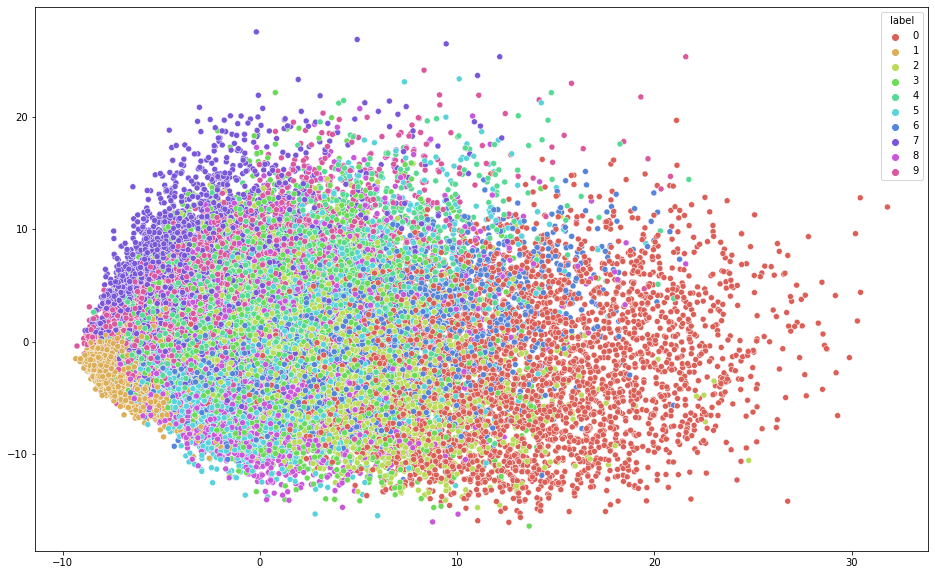

In [11]:
plt.figure(figsize=(16,10))

sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');

In [12]:
%%time
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(train)

CPU times: user 1h 10min 27s, sys: 1.33 s, total: 1h 10min 28s
Wall time: 1h 1min 39s


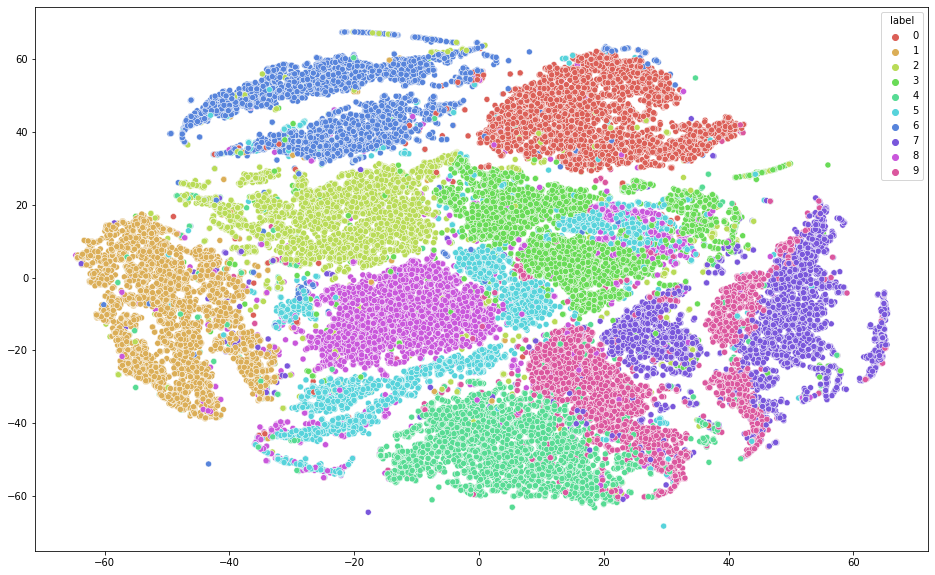

In [13]:
plt.figure(figsize=(16,10))

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');

In [14]:
pca = PCA(n_components=50)
pca_res_50 = pca.fit_transform(train)

In [15]:
%%time
tsne_res = tsne.fit_transform(pca_res_50)

CPU times: user 23min 36s, sys: 1.08 s, total: 23min 37s
Wall time: 14min 40s


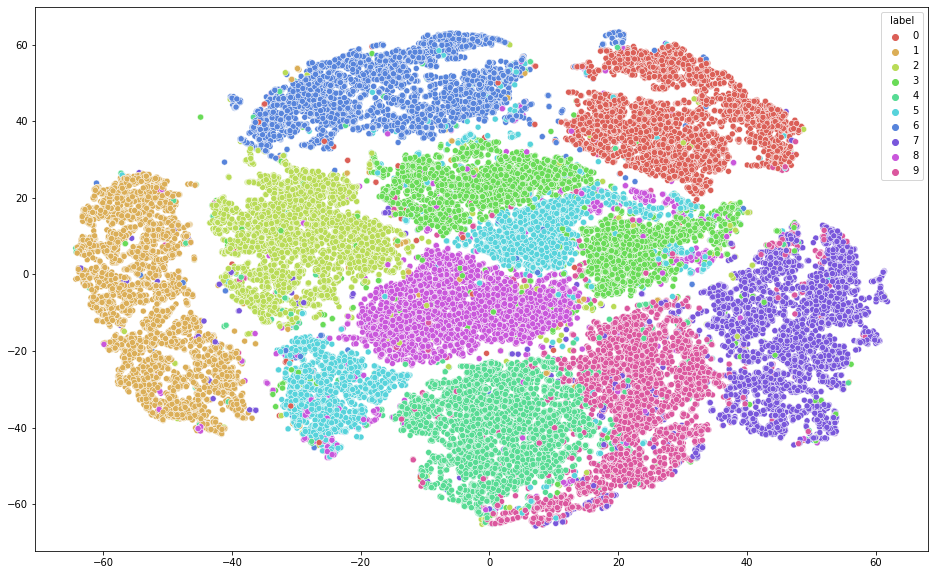

In [16]:
plt.figure(figsize=(16,10))

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');